In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pickle

In [2]:
df = pd.read_excel('./ClapPredictionModels/Dataset.xlsx')
df.head(3)

,ID,title,claps,popularity,popularity_level,pub_date,Age_19Sep20,url,tags,content_summary,...,MTBI_Thinking,MTBI_Feeling,MTBI_Judging,MTBI_Perceiving,Big5_Openess,Big5_Conscientiousness,Big5_Extraversion,Big5_Agreeableness,Big5_Neuroticism,raw_text
0,125,10 Common Software Architectural Patterns in a...,34000,"More Than 5,000 Claps","1. >10,000 Claps",2020-09-02,18,https://towardsdatascience.com/10-common-softw...,"['Software Architecture', 'Programming', 'Comp...","['This text is about...', 'privacy', 'identifi...",...,0.862465,0.137535,0.593567,0.406433,4.186753,3.552066,3.302236,3.442540,2.337750,10 Common Software Architectural Patterns in a...
1,126,The 5 Clustering Algorithms Data Scientists Ne...,20000,"More Than 5,000 Claps","1. >10,000 Claps",2019-09-14,372,https://towardsdatascience.com/the-5-clusterin...,"['Machine Learning', 'Clustering', 'Data Scien...","['This text is about...', 'mean', 'noise', 'ce...",...,0.846494,0.153506,0.480619,0.519381,4.308189,3.633515,2.816648,3.654723,2.545064,The 5 Clustering Algorithms Data Scientists Ne...
2,0,The best Mario Kart character according to dat...,19300,"More Than 5,000 Claps","1. >10,000 Claps",2018-06-08,834,https://medium.com/civis-analytics/the-best-ma...,"['Gaming', 'Data Science', 'Analytics', 'Video...","['This text is about...', 'look', 'survey', 'c...",...,0.849665,0.150335,0.523915,0.476085,4.009136,3.407692,3.367954,3.269832,2.885589,The best Mario Kart character according to dat...


In [3]:
df.describe()

,ID,claps,Age_19Sep20,title_word_count,text_word_count,vocab_count_excl_commonwords,sentence_count,average_word_count_per_sentence,FS_GradeScore,image_count,...,MTBI_Sensing,MTBI_Thinking,MTBI_Feeling,MTBI_Judging,MTBI_Perceiving,Big5_Openess,Big5_Conscientiousness,Big5_Extraversion,Big5_Agreeableness,Big5_Neuroticism
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,2724.445000,218.400000,18.545000,2278.425000,229.745000,93.345000,25.841983,35.386950,12.515000,...,0.426969,0.836231,0.163769,0.601118,0.398881,4.145653,3.547230,3.088204,3.459402,2.661431
std,57.879185,5065.317879,239.903289,3.612927,1203.553021,112.717194,55.681939,7.420042,21.412841,10.428497,...,0.193103,0.079611,0.079611,0.113540,0.113540,0.134539,0.235352,0.262667,0.138747,0.183324
min,0.000000,1.000000,0.000000,9.000000,624.000000,68.000000,13.000000,14.602353,-86.590000,1.000000,...,0.033954,0.492476,0.023378,0.304828,0.162761,3.387003,2.343056,2.461933,3.193464,2.220980
25%,49.750000,88.500000,5.000000,16.000000,1426.000000,150.750000,56.750000,21.209722,30.065000,6.000000,...,0.274669,0.791143,0.109546,0.515596,0.319672,4.072675,3.409020,2.884977,3.360789,2.532678
50%,99.500000,444.500000,116.500000,19.000000,1988.000000,197.500000,82.500000,24.086995,39.670000,10.000000,...,0.403838,0.849139,0.150861,0.601141,0.398859,4.160754,3.539998,3.105917,3.456802,2.640201
75%,149.250000,2025.000000,399.000000,21.000000,2863.500000,282.750000,117.250000,27.847562,47.570000,17.000000,...,0.562955,0.890454,0.208857,0.680328,0.484404,4.237128,3.685454,3.276227,3.541581,2.791930
max,199.000000,34000.000000,962.000000,31.000000,8752.000000,844.000000,430.000000,68.272727,65.120000,68.000000,...,0.891903,0.976622,0.507524,0.837239,0.695172,4.445661,4.034288,3.869298,3.857825,3.150098


In [4]:
df.dtypes

ID                                   int64
title                               object
claps                                int64
popularity                          object
popularity_level                    object
pub_date                            object
Age_19Sep20                          int64
url                                 object
tags                                object
content_summary                     object
most_common_trigrams                object
title_word_count                     int64
text_word_count                      int64
vocab_count_excl_commonwords         int64
most frequent words                 object
sentence_count                       int64
average_word_count_per_sentence    float64
FS_GradeLevel                       object
FS_GradeScore                      float64
image_count                          int64
embedded_vids_count                  int64
other_embedded_items_count           int64
imgs_per_1000words                 float64
vids_per_10

In [5]:
df=df.drop(['ID'], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

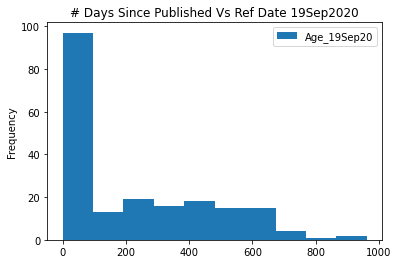

In [6]:
df['Age_19Sep20'].plot.hist()
plt.legend()
plt.title("# Days Since Published Vs Ref Date 19Sep2020")
plt.show

The dataset articles were scraped from Towards Data Science and Analytics Vidhya's Main Home Pages and mostly new (1-2 Mths Old). A few additional articles from 2019 and 2018 were added for variety and higher view counts. (Therefore the simple linear regression model later may not be representative of actual population) 

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

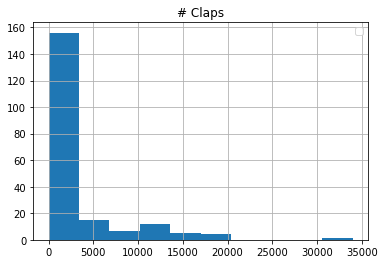

In [7]:
df['claps'].hist()
plt.legend()
plt.title("# Claps")
plt.show

In terms of No of Claps , the articles harvested showed a "power law" type pattern. Most were low claps with only a few high claps

In [8]:
#Normalising the data as using the log of #Claps gives it a better relationship 
df['log_claps']=np.log(df.claps)

df.corr()

,claps,Age_19Sep20,title_word_count,text_word_count,vocab_count_excl_commonwords,sentence_count,average_word_count_per_sentence,FS_GradeScore,image_count,embedded_vids_count,...,MTBI_Thinking,MTBI_Feeling,MTBI_Judging,MTBI_Perceiving,Big5_Openess,Big5_Conscientiousness,Big5_Extraversion,Big5_Agreeableness,Big5_Neuroticism,log_claps
claps,1.000000,0.373742,-0.283942,0.238531,0.195369,0.341917,-0.222197,0.158143,-0.024142,-0.084783,...,-0.023670,0.023670,-0.040401,0.040404,-0.048290,0.035929,-0.022021,0.029366,0.028443,0.688800
Age_19Sep20,0.373742,1.000000,-0.226088,0.096664,0.116544,0.127180,-0.098447,-0.020144,-0.036006,-0.134444,...,-0.094340,0.094340,-0.084974,0.084977,-0.189007,-0.026569,-0.044194,0.025657,0.048537,0.530813
title_word_count,-0.283942,-0.226088,1.000000,-0.013820,0.005698,-0.015152,0.054613,0.040076,-0.021758,0.064206,...,0.128006,-0.128006,-0.026239,0.026245,0.022823,-0.044337,-0.080094,0.039862,-0.003779,-0.330276
text_word_count,0.238531,0.096664,-0.013820,1.000000,0.960014,0.884188,0.051486,0.001861,0.349494,0.133958,...,0.168805,-0.168805,0.116373,-0.116388,-0.118049,0.149886,-0.059243,0.096929,0.089536,0.316971
vocab_count_excl_commonwords,0.195369,0.116544,0.005698,0.960014,1.000000,0.791336,0.172474,-0.174550,0.329560,0.123462,...,0.186892,-0.186892,0.169109,-0.169123,-0.103598,0.152557,-0.081385,0.096331,0.122185,0.285649
sentence_count,0.341917,0.127180,-0.015152,0.884188,0.791336,1.000000,-0.325459,0.301203,0.265375,0.009364,...,0.137293,-0.137293,0.069688,-0.069702,-0.069429,0.105351,-0.048264,0.149983,0.010156,0.416929
average_word_count_per_sentence,-0.222197,-0.098447,0.054613,0.051486,0.172474,-0.325459,1.000000,-0.806125,0.065572,0.215801,...,0.074033,-0.074033,0.031441,-0.031439,-0.033503,0.054750,0.014434,-0.076171,0.130928,-0.318169
FS_GradeScore,0.158143,-0.020144,0.040076,0.001861,-0.174550,0.301203,-0.806125,1.000000,0.001428,-0.010569,...,-0.025276,0.025276,-0.133704,0.133699,0.097110,0.004447,0.006027,0.071093,-0.149081,0.148166
image_count,-0.024142,-0.036006,-0.021758,0.349494,0.329560,0.265375,0.065572,0.001428,1.000000,0.163696,...,-0.082041,0.082041,-0.047448,0.047443,-0.161065,-0.019404,-0.087496,-0.030695,0.142663,-0.028168
embedded_vids_count,-0.084783,-0.134444,0.064206,0.133958,0.123462,0.009364,0.215801,-0.010569,0.163696,1.000000,...,0.153416,-0.153416,-0.002056,0.002058,0.069982,0.044042,-0.076847,0.055786,-0.102085,-0.155301


In [9]:
column_list=['claps','Age_19Sep20','title_word_count', 'text_word_count', 'vocab_count_excl_commonwords', 'sentence_count',
       'average_word_count_per_sentence','FS_GradeScore',
       'imgs_per_1000words', 'vids_per_1000words', 'polarity', 'subjectivity',
       'MTBI_Introversion', 'MTBI_Extraversion', 'MTBI_iNtuiting',
       'MTBI_Sensing', 'MTBI_Thinking', 'MTBI_Feeling', 'MTBI_Judging',
       'MTBI_Perceiving', 'Big5_Openess', 'Big5_Conscientiousness',
       'Big5_Extraversion', 'Big5_Agreeableness', 'Big5_Neuroticism','log_claps']

#To show correlations against Log No Of Claps only
corr_for_log_claps=pd.DataFrame()
temp=[]
for column in column_list:
    temp.append(df.corr().loc['log_claps',column])

corr_for_log_claps["Correlation w log claps"]=temp    
corr_for_log_claps.insert(0,"Metric",column_list)

corr_for_log_claps= corr_for_log_claps.iloc[corr_for_log_claps['Correlation w log claps'].abs().argsort()[::-1]]
corr_for_log_claps.style.hide_index()

Metric,Correlation w log claps
log_claps,1
claps,0.6888
Age_19Sep20,0.530813
sentence_count,0.416929
title_word_count,-0.330276
average_word_count_per_sentence,-0.318169
text_word_count,0.316971
vocab_count_excl_commonwords,0.285649
MTBI_Sensing,-0.203532
MTBI_iNtuiting,0.203532


Age of article has by far the biggest correlation followed by sentence count and negative corr for title_word_count (i.e shorter titles better) and ave word count per sentence (shorter sentences better) 

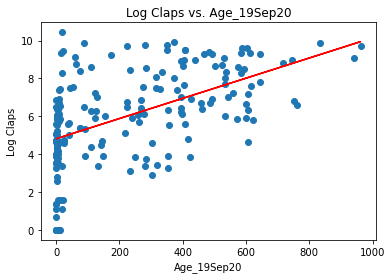

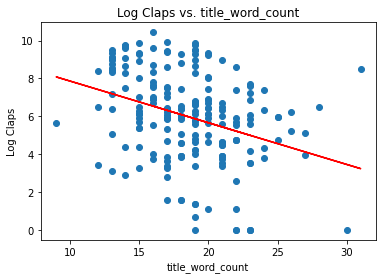

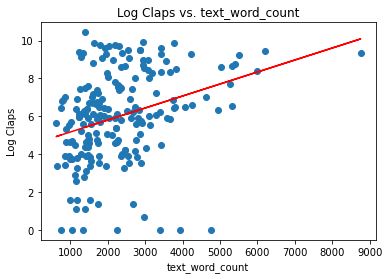

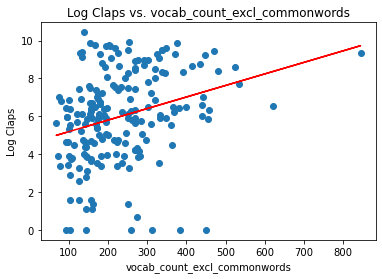

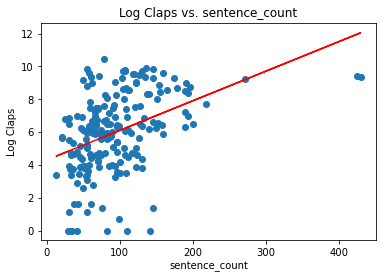

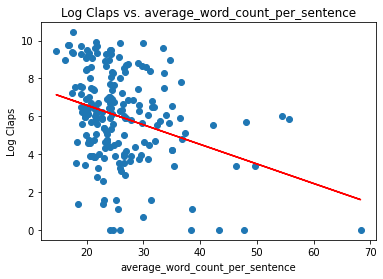

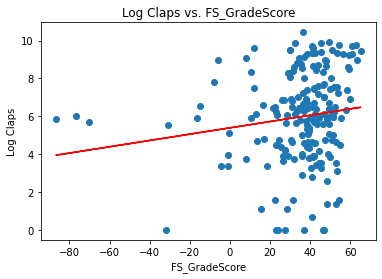

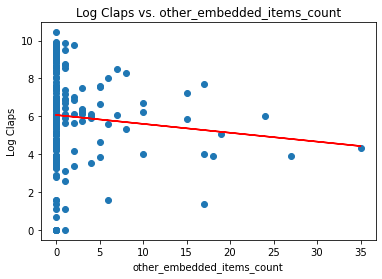

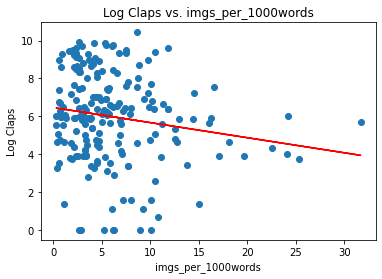

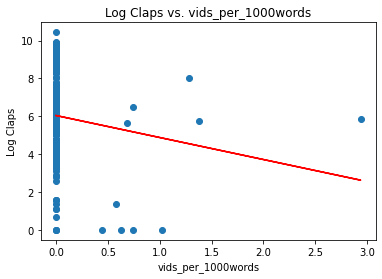

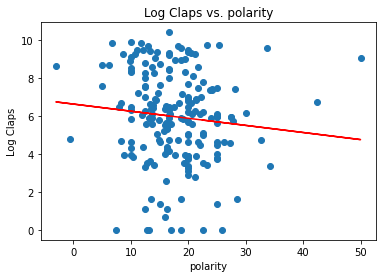

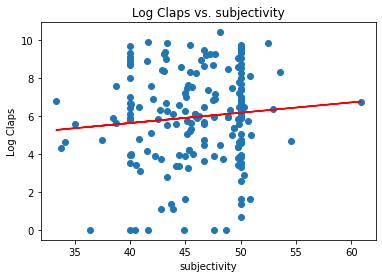

In [10]:
metrics=['Age_19Sep20','title_word_count', 'text_word_count',
        'vocab_count_excl_commonwords', 'sentence_count',
       'average_word_count_per_sentence','FS_GradeScore', 'other_embedded_items_count',
       'imgs_per_1000words', 'vids_per_1000words', 'polarity',
       'subjectivity']

for metric in metrics:
        
    X = df[metric].values.reshape(-1, 1)  
    Y = df["log_claps"].values.reshape(-1, 1)  
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    plt.scatter(X, Y)
    plt.title('Log Claps vs. '+metric)
    plt.xlabel(metric)
    plt.ylabel("Log Claps")

    plt.plot(X, Y_pred, color='red')
    
    plt.show()


Patterns across Hi / Med / Low Clap Articles a bit easier represented via side-by-side box plots

In [23]:
No_By_HML_Class=[len(df.loc[df['popularity'] == 'More Than 5,000 Claps']) , len(df.loc[df['popularity'] == "Between 500-5,000 Claps"]), len(df.loc[df['popularity'] == "Less Than 500 Claps"][metric])]
No_By_HML_Class

[37, 58, 105]

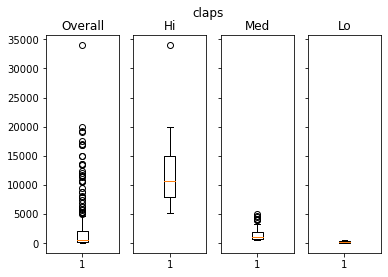

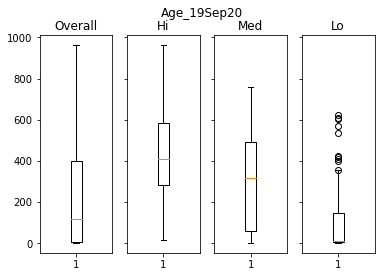

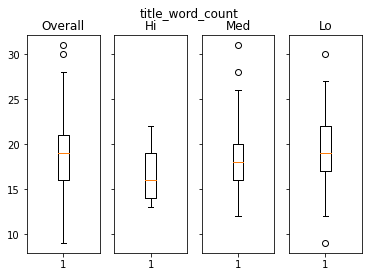

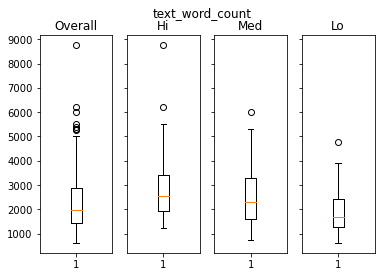

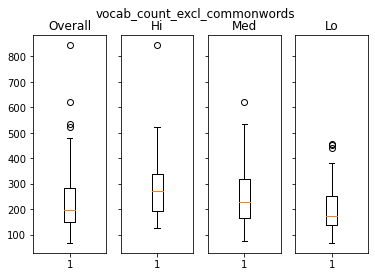

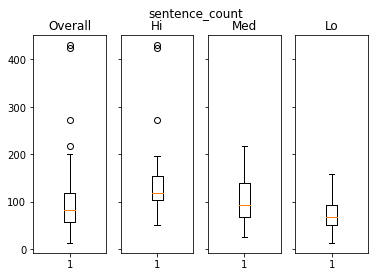

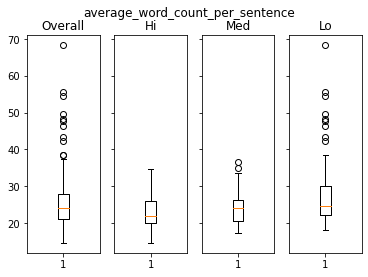

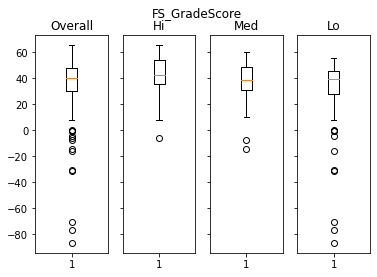

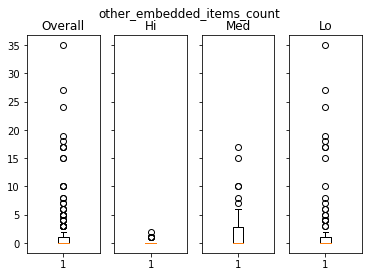

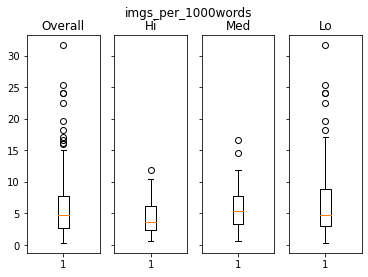

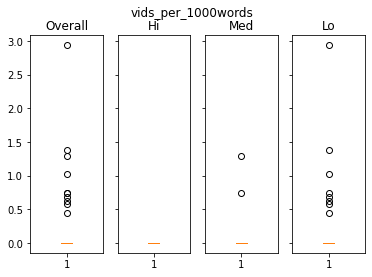

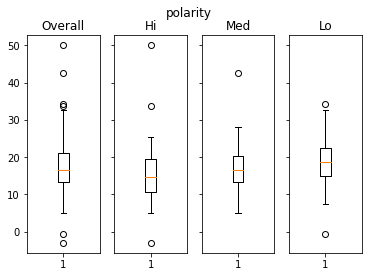

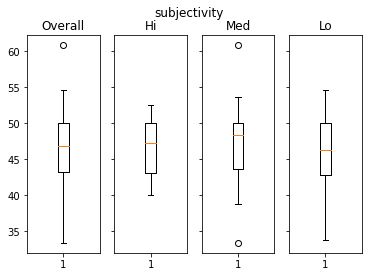

In [11]:
metrics=['claps','Age_19Sep20','title_word_count', 'text_word_count',
        'vocab_count_excl_commonwords', 'sentence_count',
       'average_word_count_per_sentence','FS_GradeScore', 'other_embedded_items_count',
       'imgs_per_1000words', 'vids_per_1000words', 'polarity',
       'subjectivity']

for metric in metrics:

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharey='row')
    ax1.boxplot(df[metric])
    ax2.boxplot(df.loc[df['popularity'] == 'More Than 5,000 Claps'][metric])
    ax3.boxplot(df.loc[df['popularity'] == "Between 500-5,000 Claps"][metric])
    ax4.boxplot(df.loc[df['popularity'] == "Less Than 500 Claps"][metric])
    fig.suptitle(metric)
    ax1.set_title('Overall')
    ax2.set_title('Hi')
    ax3.set_title('Med')
    ax4.set_title('Lo')
    plt.show

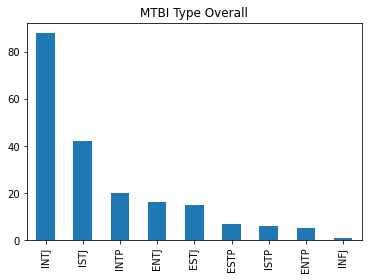

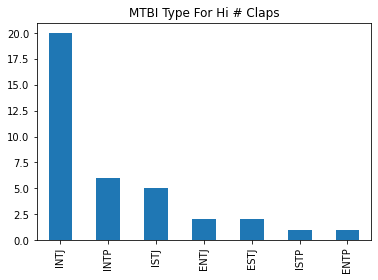

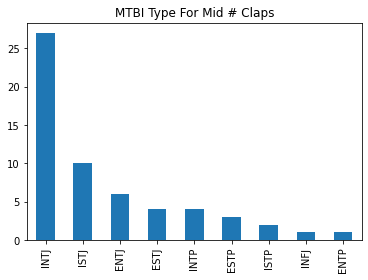

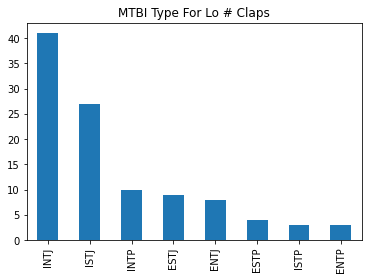

In [12]:
df['MTBI_Type'].value_counts().plot(kind='bar')
plt.title('MTBI Type Overall')
plt.show()
df.loc[df['popularity'] == 'More Than 5,000 Claps']['MTBI_Type'].value_counts().plot(kind='bar')
plt.title('MTBI Type For Hi # Claps')
plt.show()
df.loc[df['popularity'] == "Between 500-5,000 Claps"]['MTBI_Type'].value_counts().plot(kind='bar')
plt.title('MTBI Type For Mid # Claps')
plt.show()
plt.title('MTBI Type For Lo # Claps')
df.loc[df['popularity'] == "Less Than 500 Claps"]['MTBI_Type'].value_counts().plot(kind='bar')
plt.show()

No particular pattern seems to differentiate the MTBI types for Hi/Mid/Low Clap Articles but "x-x-T-J" personality types seem to make up most of the 200 articles

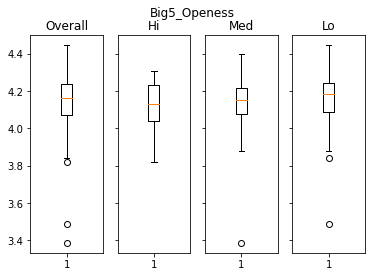

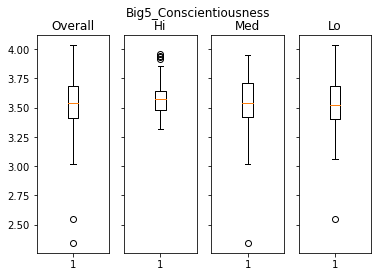

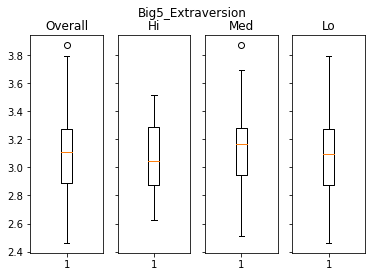

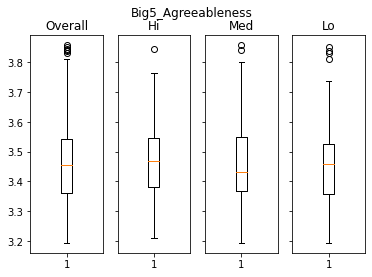

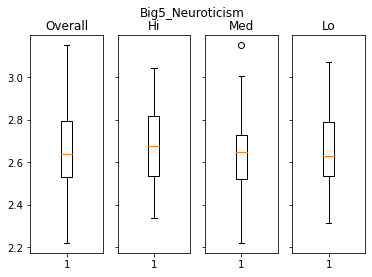

In [13]:
metrics_Big5=['Big5_Openess',
       'Big5_Conscientiousness', 'Big5_Extraversion', 'Big5_Agreeableness',
       'Big5_Neuroticism']

for metric in metrics_Big5:

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharey='row')
    ax1.boxplot(df[metric])
    ax2.boxplot(df.loc[df['popularity'] == 'More Than 5,000 Claps'][metric])
    ax3.boxplot(df.loc[df['popularity'] == "Between 500-5,000 Claps"][metric])
    ax4.boxplot(df.loc[df['popularity'] == "Less Than 500 Claps"][metric])
    fig.suptitle(metric)
    ax1.set_title('Overall')
    ax2.set_title('Hi')
    ax3.set_title('Med')
    ax4.set_title('Lo')
    plt.show

Similarly , no clear pattern for the Big5 personality characteristics separate the diff Hi / Mid / Lo Clap Articles 

In [14]:
df = pd.read_excel('Dataset.xlsx')
df['log_claps']=np.log(df.claps)

#Regression Variables were "hand-picked" to exclude non numerical and both MTBI and Big5 OCEAN characteristics

column_for_regression=["Age_19Sep20","sentence_count","title_word_count","average_word_count_per_sentence",
                      "text_word_count","vocab_count_excl_commonwords","imgs_per_1000words",
                      "FS_GradeScore","vids_per_1000words","polarity","subjectivity"]


X=df.loc[:, df.columns.intersection(column_for_regression)]
y = df['log_claps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
LinRegModel = LinearRegression()
LinRegModel.fit(X_train, y_train)
r_sq = LinRegModel.score(X_test, y_test)
print("Simple Multi-variate Linear Regression")
print("")
print('coefficient of determination:', round(r_sq,3))
print("")
print('intercept:', LinRegModel.intercept_)
print("")
print('slope:', LinRegModel.coef_)
print("")
predicted_claps_LinReg = LinRegModel.predict(X_test)   
mse = sum(abs(predicted_claps_LinReg - y_test.values.tolist())) / y_test.shape[0]
LinReg_mse = mean_squared_error(y_test, predicted_claps_LinReg)
print('Mean Sq Error in Log Claps',LinReg_mse)
print("")
print('Mean Sq Error in Claps',np.exp(LinReg_mse))

Simple Multi-variate Linear Regression

coefficient of determination: 0.065

intercept: 10.21541764657869

slope: [ 4.38506868e-03 -1.46529878e-01  4.46526342e-04 -2.17504214e-03
  9.19796804e-03 -1.23576532e-01 -3.16856045e-02 -3.64142236e-02
 -6.80097235e-01 -7.41468402e-03  1.95070039e-02]

Mean Sq Error in Log Claps 3.2761473392682334

Mean Sq Error in Claps 26.473582242958063


In [16]:
lasso_alphas = 10**np.linspace(-5,0,1000)
lasso_cv = LassoCV(alphas = lasso_alphas, cv=5)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
predicted_claps_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, predicted_claps_lasso)
r_sq = lasso.score(X_test, y_test)

print("Lasso Regression")
print("")
print('coefficient of determination:', round(r_sq,3))
print("")
print('intercept:', lasso.intercept_)
print("")
print('slope:', lasso.coef_)
print("")
print('Mean Sq Error in Log Claps',lasso_mse)
print("")
print('Mean Sq Error in Claps',np.exp(lasso_mse))

Lasso Regression

coefficient of determination: 0.15

intercept: 9.663390893511062

slope: [ 0.00455696 -0.12805913  0.0001551  -0.00020224  0.01208566 -0.1081888
 -0.02610275 -0.02291141 -0.         -0.          0.00367387]

Mean Sq Error in Log Claps 2.9808675609515247

Mean Sq Error in Claps 19.704904436983036


Lasso Regularised Regression has a better MSE than Plain Vanilla OLS Regression

In [17]:
ridge_alphas = 10**np.linspace(0,4,200)
ridge_cv = RidgeCV(ridge_alphas, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)
predicted_claps_ridge = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, predicted_claps_ridge)
r_sq = ridge.score(X_test, y_test)

print("Ridge Regression")
print("")
print('coefficient of determination:', round(r_sq,3))
print("")
print('intercept:', ridge.intercept_)
print("")
print('slope:', ridge.coef_)
print("")
print('Mean Sq Error in Log Claps',ridge_mse)
print("")
print('Mean Sq Error in Claps',np.exp(ridge_mse))

Ridge Regression

coefficient of determination: 0.142

intercept: 9.446262716930553

slope: [ 0.00454963 -0.12695203  0.00024302 -0.00157102  0.01238448 -0.11282583
 -0.0301749  -0.03266536 -0.01177659 -0.00913171  0.02035263]

Mean Sq Error in Log Claps 3.007545735731265

Mean Sq Error in Claps 20.237670334239844


Ridge Regularised Regression seems to be worse (higher MSE) than Lasso regression

In [18]:
#m is any number between 0-39 (represents a sample from within the Test Dataset)
m=3
print(X_test.iloc[m])
print("")
print("No Of Actual Claps",round(np.exp(y_test.iloc[m]),0))
print("")
LinReg_predicted_claps = LinRegModel.predict([X_test.iloc[m].values.tolist()]) 
print("Predicted Claps (Simple Multi Linear Regression):",round(np.exp(LinReg_predicted_claps[0]),1))
print("")
lasso_predicted_claps = lasso.predict([X_test.iloc[m].values.tolist()]) 
print("Predicted Claps (Lasso Regression):",round(np.exp(lasso_predicted_claps[0]),1))
print("")
ridge_predicted_claps = ridge.predict([X_test.iloc[m].values.tolist()]) 
print("Predicted Claps (Ridge Regression):",round(np.exp(ridge_predicted_claps[0]),1))

Age_19Sep20                           1.000000
title_word_count                     16.000000
text_word_count                    2391.000000
vocab_count_excl_commonwords        220.000000
sentence_count                       90.000000
average_word_count_per_sentence      26.566667
FS_GradeScore                        36.020000
imgs_per_1000words                    7.109996
vids_per_1000words                    0.000000
polarity                             15.932540
subjectivity                         40.119048
Name: 158, dtype: float64

No Of Actual Claps 55.0

Predicted Claps (Simple Multi Linear Regression): 195.1

Predicted Claps (Lasso Regression): 181.8

Predicted Claps (Ridge Regression): 168.0


In [19]:
all_predicted_claps = lasso.predict(X_test)   
Plot_Pred_Actual=pd.DataFrame() 
Plot_Pred_Actual["Predicted Log Claps"]=(all_predicted_claps)
Plot_Pred_Actual["Actual Log Claps"]=(y_test.values.tolist())
Plot_Pred_Actual["Predicted Claps"]=np.exp(all_predicted_claps)
Plot_Pred_Actual["Actual Claps"]=np.exp(y_test.values.tolist())

<AxesSubplot:xlabel='Actual Log Claps', ylabel='Predicted Log Claps'>

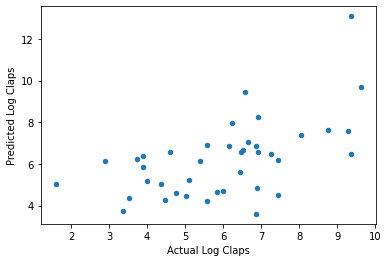

In [20]:
Plot_Pred_Actual.plot.scatter(y="Predicted Log Claps",x="Actual Log Claps")

When viewed this way, a "perfect" prediction would mean a straight line of y=x but here the performance is poor

(0.0, 20000.0)

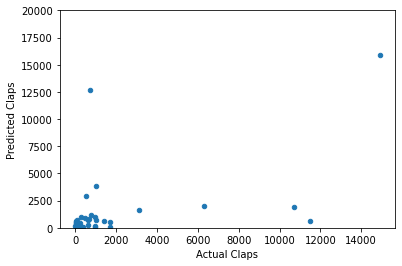

In [21]:
Plot_Pred_Actual.plot.scatter(y="Predicted Claps",x="Actual Claps")
plt.ylim(top=20000)
plt.ylim(bottom=0)

When converted to absolute terms (not log terms), the predictions look even worse for any articles that have clap numbers beyond 2,000

In [22]:
# Save to file in the current working directory
# pkl_filename = "clap_prediction_model_lasso.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(lasso, file)